## Developed by: Saad Aldin Mohamed
## email: sa3danny@yahoo.com

In [1]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)

# Ignore useless warnings
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# ------------------------------------- Data preparation -------------------------------------------

In [2]:
activation_data = pd.read_excel('Activation_status_data.xlsx')
activation_data.head(3)

,name,activated,N2_BET,N2_Langmiur,last solvent,method
0,ACAJIZ_clean,yes,0.0,0.0,chloroform,exchange
1,ACAJOF_clean,yes,0.0,0.0,chloroform,exchange
2,ACUFEK_clean,yes,NaN,3800.0,dichloromethane,exchange


In [3]:
activation_data['activated'].unique()

array(['yes', nan, 'no', 'dup-remove', 'hypo-remove'], dtype=object)

In [4]:
## Remove duplicate and hypothetical enteries
dup_remove = activation_data[activation_data['activated']=='dup-remove'].index
hypo_remove = activation_data[activation_data['activated']=='hypo-remove'].index
activation_data = activation_data.drop(dup_remove)
activation_data = activation_data.drop(hypo_remove)

print ('Removed duplicate enteries = ', len(dup_remove))
print ('Removed hypothetical enteries = ', len(hypo_remove))
print ('size of the remaining data = ', len(activation_data))

Removed duplicate enteries =  49
Removed hypothetical enteries =  6
size of the remaining data =  280


# ----------------------------------    Geomterical Properties    ------------------------------------

In [5]:
geom_all = pd.read_csv("2019-11-01-ASR-public_12020.csv")
geom_data = geom_all[['filename', 'LCD', 'PLD', 'LFPD', 'cm3_g', 'ASA_m2_cm3', 'ASA_m2_g', 'AV_VF', 'AV_cm3_g']]
geom_data = pd.DataFrame(geom_data)
geom_data.rename(columns = {'filename':'name'}, inplace=True)
geom_data.head(3)

,name,LCD,PLD,LFPD,cm3_g,ASA_m2_cm3,ASA_m2_g,AV_VF,AV_cm3_g
0,1499489-acs.cgd.6b01265_1499490_clean,10.85017,3.77263,10.26663,0.884188,1701.53,1924.40,0.6458,0.730388
1,ACECIV_ion_b,3.59910,2.94934,3.57968,2.601950,0.00,0.00,0.2312,0.088857
2,ACOCOM_clean,24.60642,13.03430,24.60642,0.349927,1537.41,4393.52,0.8630,2.466230


In [6]:
#Merge activation data with geometerical data
activation_geom = pd.merge(activation_data, geom_data, on = 'name', how = "inner" )
activation_geom.head(10)

,name,activated,N2_BET,N2_Langmiur,last solvent,method,LCD,PLD,LFPD,cm3_g,ASA_m2_cm3,ASA_m2_g,AV_VF,AV_cm3_g
0,ACAJIZ_clean,yes,0.0,0.0,chloroform,exchange,6.18650,5.74044,6.18650,1.301480,981.157,753.879,0.4824,0.370656
1,ACAJOF_clean,yes,0.0,0.0,chloroform,exchange,6.86398,6.10482,6.86398,1.218710,1121.270,920.046,0.5130,0.420936
2,ACUFEK_clean,yes,NaN,3800.0,dichloromethane,exchange,15.55627,9.00897,15.55627,0.559431,2205.120,3941.720,0.7870,1.406790
3,ADASAB_charged,yes,880.0,1030.0,CO2,supercritical,22.82402,13.49014,22.78048,0.343942,1661.070,4829.510,0.8736,2.539960
4,ADASEF_clean,yes,1740.0,3180.0,CO2,supercritical,21.62414,10.92309,17.56550,0.435607,1820.410,4179.020,0.8462,1.942580
5,ADASIJ_clean,yes,1070.0,1590.0,methanol,exchange,18.23438,6.60024,18.20695,0.629251,2196.940,3491.360,0.7650,1.215730
6,ADATEG_manual,NaN,NaN,NaN,NaN,NaN,27.33782,13.33904,27.33782,0.238777,1473.420,6170.700,0.8960,3.752460
7,ADOGEH_clean,yes,1834.0,NaN,ethanol,exchange,12.71447,5.05258,12.69973,1.019910,1997.130,1958.140,0.6770,0.663783
8,AGOFEJ_clean,yes,0.0,0.0,dichloromethane,exchange,12.61380,8.71559,12.59801,0.583675,1959.850,3357.770,0.7670,1.314090
9,ALAMUW_clean,yes,NaN,2450.0,acetone,exchange,11.92678,5.98269,11.92678,0.649970,2447.930,3766.220,0.7610,1.170820


In [7]:
activated_geom = activation_geom[(activation_geom['activated'] == 'yes')]
collapsed_geom = activation_geom[(activation_geom['activated'] == 'no')]

print ('Activated MOFs', len(activated_geom))
print ('collapsed MOFs', len(collapsed_geom))

Activated MOFs 188
collapsed MOFs 31


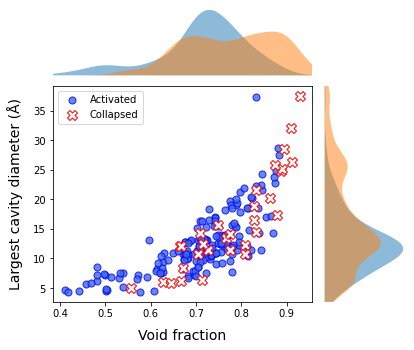

In [8]:
from matplotlib.ticker import NullFormatter
from sklearn.neighbors import KernelDensity

#-----------------------------------------------
xa = activated_geom['AV_VF']
xc = collapsed_geom['AV_VF']

ya = activated_geom['LCD']
yc = collapsed_geom['LCD']

Xlabel = "Void fraction"
Ylabel = "Largest cavity diameter (Å)"
#------------------------------------------------

#https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/scatter_hist.html

# definitions for the axes
left, width = 0.15, 0.6
bottom, height = 0.15, 0.6
spacing = 0.02
 
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(6, 5))

ax_scatter = plt.axes(rect_scatter)
ax_histx = plt.axes(rect_histx)
ax_histy = plt.axes(rect_histy)

# no labels
nullfmt = NullFormatter()   
ax_histx.xaxis.set_major_formatter(nullfmt)
ax_histy.yaxis.set_major_formatter(nullfmt)

#------------------------------  the scatter plot -------------------------------#
ax_scatter.scatter(x=xa, y =ya, c = 'royalblue', edgecolor ='blue', alpha = 0.8,
            s =50,  label = "Activated")
ax_scatter.scatter(x=xc, y =yc, marker= "X", s =100,
            edgecolor ='r', c ='w', label = "Collapsed")
ax_scatter.legend(loc ='upper left')
ax_scatter.set_xlabel(Xlabel, fontsize = 14, labelpad= 10)
ax_scatter.set_ylabel(Ylabel, fontsize = 14, labelpad= 10)

#------------------------------ Upper histogram ---------------------------------#
xlim1, xlim2 = ax_scatter.get_xlim()
x_d = np.linspace(xlim1, xlim2 ,1000)
mi1 = min(min(xa), min(xc))
mx1 = max(max(xa), max(xc))
bw = (mx1-mi1)/15

# fitting activated
kde = KernelDensity(bandwidth=bw, kernel='gaussian')
kde.fit(xa[:, None])
log_density_1 = kde.score_samples(x_d[:, None])
# fitting collapsed
kde = KernelDensity(bandwidth=bw, kernel='gaussian')
kde.fit(xc[:, None])
log_density_2 = kde.score_samples(x_d[:, None])
ax_histx.fill_between(x_d, np.exp(log_density_1), alpha=0.5, label='Activated')
ax_histx.fill_between(x_d, np.exp(log_density_2), alpha=0.5, label='Collapsed')

#----------------------------- Right histogram --------------------------------#

ylim1, ylim2 = ax_scatter.get_ylim()
y_d = np.linspace(ylim1, ylim2 ,1000)
mi2 = min(min(ya), min(yc))
mx2 = max(max(ya), max(yc))
bw = (mx2-mi2)/15

# fitting the activated MOFs
kde = KernelDensity(bandwidth=bw, kernel='gaussian')
kde.fit(ya[:, None])
log_density_1 = kde.score_samples(y_d[:, None])
# fitting the collapsed MOFs
kde = KernelDensity(bandwidth=bw, kernel='gaussian')
kde.fit(yc[:, None])
log_density_2 = kde.score_samples(y_d[:, None])
#----
ax_histy.fill_betweenx(y_d, np.exp(log_density_1), alpha=0.5, label='Activated')
ax_histy.fill_betweenx(y_d, np.exp(log_density_2), alpha=0.5, label='Collapsed')

#--------- axises limits of the histograms should be same as for the scatter plots ---------#

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

#------------------ remove the axis and frame of the histograms ----------------------------#
ax_histx.set_yticks([])
ax_histy.set_xticks([])
ax_histx.axis('off')
ax_histy.axis('off')
#--------------------------------------------------------------------------------------------#

plt.rc('font', size=12)
plt.rc('axes', titlesize=12)

plt.savefig("VF vs LCD.png", dpi=200)


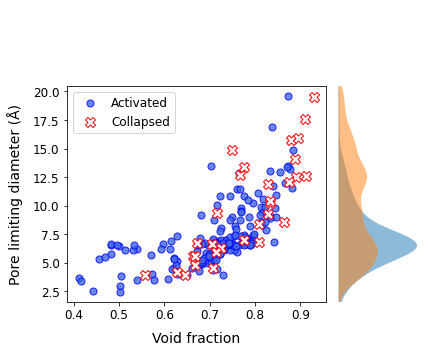

In [9]:
from matplotlib.ticker import NullFormatter
from sklearn.neighbors import KernelDensity

#-----------------------------------------------
xa = activated_geom['AV_VF']
xc = collapsed_geom['AV_VF']

ya = activated_geom['PLD']
yc = collapsed_geom['PLD']

Xlabel = "Void fraction"
Ylabel = "Pore limiting diameter (Å)"
#------------------------------------------------

#https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/scatter_hist.html

# definitions for the axes
left, width = 0.15, 0.6
bottom, height = 0.15, 0.6
spacing = 0.02
 
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(6, 5))

ax_scatter = plt.axes(rect_scatter)
ax_histx = plt.axes(rect_histx)
ax_histy = plt.axes(rect_histy)

# no labels
nullfmt = NullFormatter()   
ax_histx.xaxis.set_major_formatter(nullfmt)
ax_histy.yaxis.set_major_formatter(nullfmt)

#------------------------------  the scatter plot -------------------------------#
ax_scatter.scatter(x=xa, y =ya, c = 'royalblue', edgecolor ='blue', alpha = 0.8,
            s =50,  label = "Activated")
ax_scatter.scatter(x=xc, y =yc, marker= "X", s =100,
            edgecolor ='r', c ='w', label = "Collapsed")
ax_scatter.legend(loc ='upper left')
ax_scatter.set_xlabel(Xlabel, fontsize = 14, labelpad= 10)
ax_scatter.set_ylabel(Ylabel, fontsize = 14, labelpad= 10)

#------------------------------ Upper histogram ---------------------------------#
"""xlim1, xlim2 = ax_scatter.get_xlim()
x_d = np.linspace(xlim1, xlim2 ,1000)
mi1 = min(min(xa), min(xc))
mx1 = max(max(xa), max(xc))
bw = (mx1-mi1)/15

# fitting the activated MOFs
kde = KernelDensity(bandwidth=bw, kernel='gaussian')
kde.fit(xa[:, None])
log_density_1 = kde.score_samples(x_d[:, None])
# fitting the collapsed MOFs
kde = KernelDensity(bandwidth=bw, kernel='gaussian')
kde.fit(xc[:, None])
log_density_2 = kde.score_samples(x_d[:, None])
ax_histx.fill_between(x_d, np.exp(log_density_1), alpha=0.5, label='Activated')
ax_histx.fill_between(x_d, np.exp(log_density_2), alpha=0.5, label='Collapsed')"""

#----------------------------- Right histogram --------------------------------#

ylim1, ylim2 = ax_scatter.get_ylim()
y_d = np.linspace(ylim1, ylim2 ,1000)
mi2 = min(min(ya), min(yc))
mx2 = max(max(ya), max(yc))
bw = (mx2-mi2)/15

# fitting the activated MOF
kde = KernelDensity(bandwidth=bw, kernel='gaussian')
kde.fit(ya[:, None])
log_density_1 = kde.score_samples(y_d[:, None])
# fitting the collapsed MOFs
kde = KernelDensity(bandwidth=bw, kernel='gaussian')
kde.fit(yc[:, None])
log_density_2 = kde.score_samples(y_d[:, None])
#----
ax_histy.fill_betweenx(y_d, np.exp(log_density_1), alpha=0.5, label='Activated')
ax_histy.fill_betweenx(y_d, np.exp(log_density_2), alpha=0.5, label='Collapsed')

#--------- axises limits of the histograms should be same as for the scatter plots ---------#

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

#------------------ remove the axis and frame of the histograms ----------------------------#
ax_histx.set_yticks([])
ax_histy.set_xticks([])
ax_histx.axis('off')
ax_histy.axis('off')
#--------------------------------------------------------------------------------------------#

plt.rc('font', size=12)
plt.rc('axes', titlesize=12)

plt.savefig("VF vs PLD.png", dpi=200)


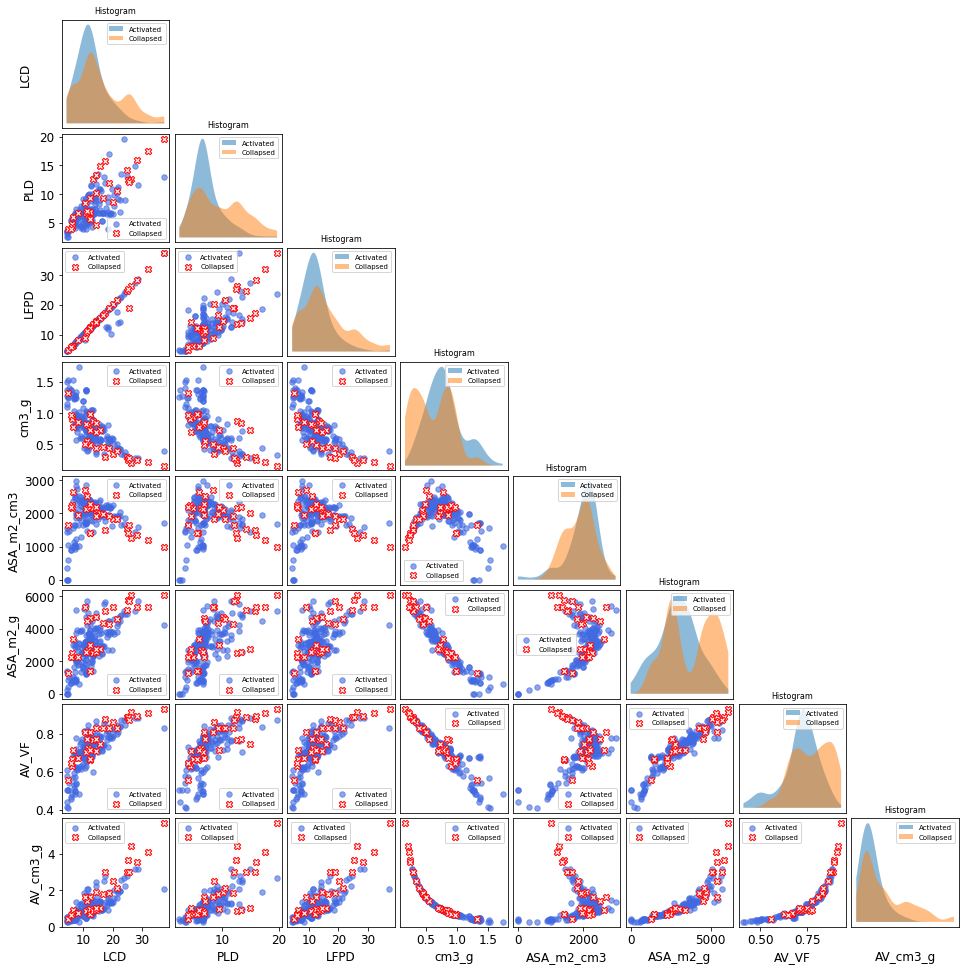

In [10]:
# Plotting all the geometerical properties in a matrix

fig, ax = plt.subplots(nrows=8, ncols=8, sharex=False, sharey=False, figsize=(14, 14))
plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0.06, right=0.95, bottom=0.05, top=0.95)

activated_geom2 = activated_geom[['LCD', 'PLD', 'LFPD', 'cm3_g', 'ASA_m2_cm3', 'ASA_m2_g','AV_VF', 'AV_cm3_g']]
collapsed_geom2 = collapsed_geom[['LCD', 'PLD', 'LFPD', 'cm3_g', 'ASA_m2_cm3', 'ASA_m2_g','AV_VF', 'AV_cm3_g']]

for i in range (0, 8):
    for j in range (0, i+1):
        
        """ axis lables """
        labelx = activated_geom2.columns[j]
        labely = activated_geom2.columns[i]
        if i ==7:
            ax[i,j].set_xlabel(labelx)
        else: ax[i,j].set_xticks([])
        if j ==0:
            ax[i,j].set_ylabel(labely)
        else: ax[i,j].set_yticks([])
            
        if i != j:  
            
            """ the i and j were reversed to have shared x and shared y"""
            xa = activated_geom2.iloc[:,j]
            ya = activated_geom2.iloc[:,i]
            xc = collapsed_geom2.iloc[:,j]
            yc = collapsed_geom2.iloc[:,i]
            
            ax[i,j].scatter(xa, ya, s =30,  c ='royalblue', edgecolor = 'royalblue',alpha=0.6, label = "Activated")
            ax[i,j].scatter(xc, yc, marker= "X", s =40, edgecolor ='r', c ='w', label = "Collapsed")
            ax[i,j].legend(loc ='best', fontsize = 7)
    
            
        else:
            
            """ to draw histograms at the diagonal"""
            x1 = activated_geom2.iloc[:,i]
            x2 = collapsed_geom2.iloc[:,i]
            mi = min(min(x1), min(x2))
            mx = max(max(x1), max(x2))
            x_d = np.linspace(mi, mx ,1000)
            bw = (mx-mi)/15

            # fitting the activated MOFs
            kde = KernelDensity(bandwidth=bw, kernel='gaussian')
            kde.fit(x1[:, None])
            log_density_1 = kde.score_samples(x_d[:, None])
            # fitting the collapsed MOFs
            kde = KernelDensity(bandwidth=bw, kernel='gaussian')
            kde.fit(x2[:, None])
            log_density_2 = kde.score_samples(x_d[:, None])

            ax[i,j].fill_between(x_d, np.exp(log_density_1), alpha=0.5, label='Activated')
            ax[i,j].fill_between(x_d, np.exp(log_density_2), alpha=0.5, label='Collapsed')
          
            ax[i,j].legend(loc ='best', fontsize = 7)
            ax[i,j].axes.ticklabel_format(axis='both', style='sci', scilimits=(0,3))
            ax[i,j].tick_params( colors="w")

            ax[i,j].set_title("Histogram", fontsize = 8)
            
            
"""axis off for the upper blocks"""      
for i in range (0, 8):
    for j in range (i+1, 8):
            ax[i, j].axis('off')

plt.savefig("Scatter materix - geometerical.png", dpi=200)

#  -----------------------  Principal Component (PCA) ----------------------------

In [11]:
initial_data = activation_geom[['LCD', 'PLD', 'LFPD', 'cm3_g', 'ASA_m2_cm3', 'ASA_m2_g','AV_VF', 'AV_cm3_g']]

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
clf = PCA(n_components=2, random_state = 0)

#------------------------------------------------------------------------------------#
"""PCP is sensetive to scale of the data, 
so we need to scale all the feature to be at same order of magnitude,
using StandardScaler() """
""" see https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 """
#------------------------------------------------------------------------------------#

scaled_data = StandardScaler().fit_transform(initial_data)
transformed = clf.fit_transform(scaled_data)

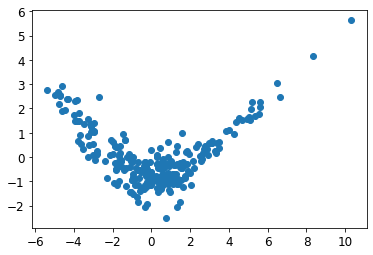

In [13]:
#quick visulization:
plt.scatter(transformed[:,0], transformed[:,1])

In [14]:
transformed_dataframe = pd.DataFrame(transformed, columns = ["0", "1"])
transformed_with_names = pd.concat([activation_geom[['name', 'activated']], transformed_dataframe], axis=1)
transformed_with_names.head(3)

,name,activated,0,1
0,ACAJIZ_clean,yes,-3.478525,1.344692
1,ACAJOF_clean,yes,-3.051697,1.120836
2,ACUFEK_clean,yes,1.529277,-0.470833


In [15]:
transformed_activated = transformed_with_names[transformed_with_names['activated']=='yes']
transformed_collapsed = transformed_with_names[transformed_with_names['activated']=='no']

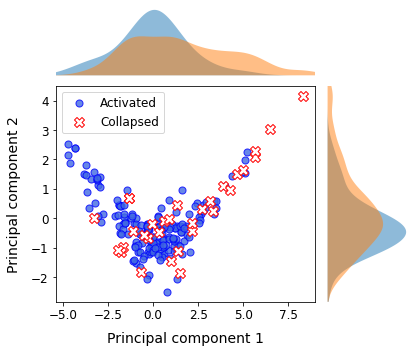

In [16]:
from matplotlib.ticker import NullFormatter
from sklearn.neighbors import KernelDensity

#-----------------------------------------------
xa = transformed_activated['0']
xc = transformed_collapsed['0']

ya = transformed_activated['1']
yc = transformed_collapsed['1']

Xlabel = "Principal component 1"
Ylabel = "Principal component 2"
#------------------------------------------------

#https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/scatter_hist.html

# definitions for the axes
left, width = 0.15, 0.6
bottom, height = 0.15, 0.6
spacing = 0.02
 
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(6, 5))

ax_scatter = plt.axes(rect_scatter)
ax_histx = plt.axes(rect_histx)
ax_histy = plt.axes(rect_histy)

# no labels
nullfmt = NullFormatter()   
ax_histx.xaxis.set_major_formatter(nullfmt)
ax_histy.yaxis.set_major_formatter(nullfmt)

#------------------------------  the scatter plot -------------------------------#
ax_scatter.scatter(x=xa, y =ya, c = 'royalblue', edgecolor ='blue', alpha = 0.8,
            s =50,  label = "Activated")
ax_scatter.scatter(x=xc, y =yc, marker= "X", s =100,
            edgecolor ='r', c ='w', label = "Collapsed")
ax_scatter.legend(loc ='upper left')
ax_scatter.set_xlabel(Xlabel, fontsize = 14, labelpad= 10)
ax_scatter.set_ylabel(Ylabel, fontsize = 14, labelpad= 10)

#------------------------------ Upper histogram ---------------------------------#
xlim1, xlim2 = ax_scatter.get_xlim()
x_d = np.linspace(xlim1, xlim2 ,1000)
mi1 = min(min(xa), min(xc))
mx1 = max(max(xa), max(xc))
bw = (mx1-mi1)/15

# fitting activated
kde = KernelDensity(bandwidth=bw, kernel='gaussian')
kde.fit(xa[:, None])
log_density_1 = kde.score_samples(x_d[:, None])
# fitting collapsed
kde = KernelDensity(bandwidth=bw, kernel='gaussian')
kde.fit(xc[:, None])
log_density_2 = kde.score_samples(x_d[:, None])
ax_histx.fill_between(x_d, np.exp(log_density_1), alpha=0.5, label='Activated')
ax_histx.fill_between(x_d, np.exp(log_density_2), alpha=0.5, label='Collapsed')

#----------------------------- Right histogram --------------------------------#

ylim1, ylim2 = ax_scatter.get_ylim()
y_d = np.linspace(ylim1, ylim2 ,1000)
mi2 = min(min(ya), min(yc))
mx2 = max(max(ya), max(yc))
bw = (mx2-mi2)/15

# fitting the activated MOFs
kde = KernelDensity(bandwidth=bw, kernel='gaussian')
kde.fit(ya[:, None])
log_density_1 = kde.score_samples(y_d[:, None])
# fitting the collapsed MOFs
kde = KernelDensity(bandwidth=bw, kernel='gaussian')
kde.fit(yc[:, None])
log_density_2 = kde.score_samples(y_d[:, None])
#----
ax_histy.fill_betweenx(y_d, np.exp(log_density_1), alpha=0.5, label='Activated')
ax_histy.fill_betweenx(y_d, np.exp(log_density_2), alpha=0.5, label='Collapsed')

#--------- axises limits of the histograms should be same as for the scatter plots ---------#

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

#------------------ remove the axis and frame of the histograms ----------------------------#
ax_histx.set_yticks([])
ax_histy.set_xticks([])
ax_histx.axis('off')
ax_histy.axis('off')
#--------------------------------------------------------------------------------------------#

plt.rc('font', size=12)
plt.rc('axes', titlesize=12)

plt.savefig("Principal_component_analysis", dpi=200)
